# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algiritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [23]:
#Librerias
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf, keras
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [6]:
#1

#Carga de imagenes
TRAIN_PATH= os.getcwd() + "/Prof/seg_train"
TEST_PATH= os.getcwd() + "/Prof/seg_test"

In [7]:
#Determinamos tamanio de imagenes y etiquetas de clases
class_names = ['mountain','street','glacier', 'buildings','sea','forest']
IMAGE_SIZE = (32,32)

In [8]:
class_names_label = {class_name:i for i ,class_name in enumerate(class_names)}
class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [9]:
#Recorremos carpetas, etiquetamos con las etiquetas de carpeta y hacemos reshape
def read_data(path, im_size, class_names_label):
   X = []
   y = []

   for folder in os.listdir(path):
       label = class_names_label[folder]
       folder_path = os.path.join(path,folder)
       # Iterar sobre todo lo que haya en path
       for file in os.listdir(folder_path):
           image_path = os.path.join(folder_path,file)
           image = cv2.imread(image_path)
           image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
           image = cv2.resize(image, im_size)
           X.append(image)
           y.append(label)


   return np.array(X), np.array(y)


X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE, class_names_label)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE, class_names_label)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14034, 32, 32, 3)
(3000, 32, 32, 3)
(14034,)
(3000,)


In [10]:
#Como las imagenes estan en orden hacemos shuffle en train para evitar sesgos
X_train,y_train=shuffle(X_train,y_train,random_state=42)

buildings


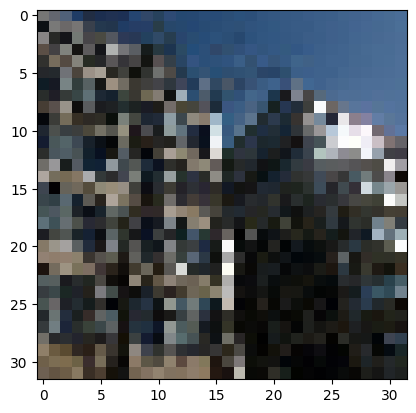

In [11]:
#2

#Investigamos algunas imagenes
index=np.random.randint(X_train.shape[0])
print(class_names[y_train[index]])
plt.imshow(X_train[index])

In [12]:
#3

#Hacemos el escalado

X_train_scal=X_train/255.0
X_test_scal=X_test/255.0

In [13]:
#4

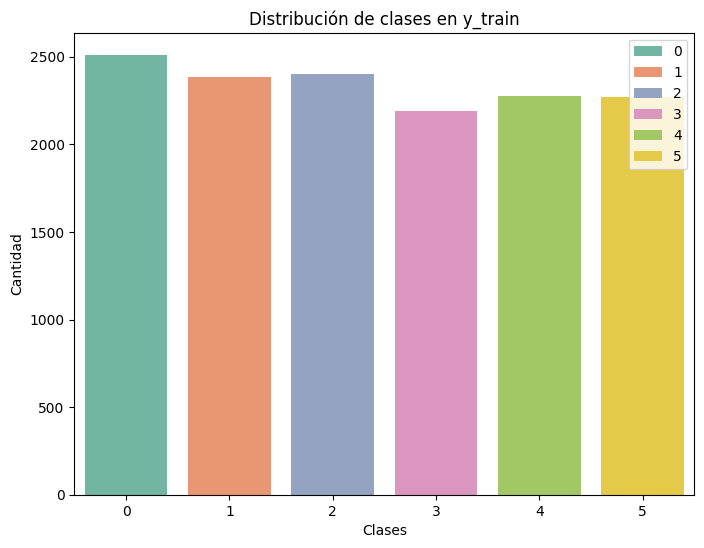

In [14]:
# Countplot para ver la target
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, hue=y_train, palette="Set2")
plt.title('Distribución de clases en y_train')
plt.xlabel('Clases')
plt.ylabel('Cantidad')
plt.show()


In [16]:
layers = [
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(6, activation='softmax')  # 6 neuronas para 6 clases con activación softmax
]

model = keras.Sequential(layers)

# Compilar el modelo con sparse_categorical_crossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [18]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience=5)

In [19]:
from keras.callbacks import ModelCheckpoint
mcheckpoint = ModelCheckpoint("callback_model.h5")

In [20]:
history = model.fit(X_train,
         y_train,
         epochs = 10,
         batch_size = 32,
         callbacks = [earlystop, mcheckpoint],
         validation_split = 0.2,
         verbose=1)

Epoch 1/10
351/351 [==============================] - 57s 154ms/step - loss: 2.6547 - accuracy: 0.5218 - val_loss: 1.0811 - val_accuracy: 0.5839
Epoch 2/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


351/351 [==============================] - 53s 149ms/step - loss: 0.9587 - accuracy: 0.6320 - val_loss: 1.0205 - val_accuracy: 0.6185
Epoch 3/10
351/351 [==============================] - 48s 136ms/step - loss: 0.8582 - accuracy: 0.6752 - val_loss: 0.8677 - val_accuracy: 0.6851
Epoch 4/10
351/351 [==============================] - 47s 134ms/step - loss: 0.7434 - accuracy: 0.7227 - val_loss: 0.8561 - val_accuracy: 0.6815
Epoch 5/10
351/351 [==============================] - 49s 139ms/step - loss: 0.6568 - accuracy: 0.7565 - val_loss: 0.8667 - val_accuracy: 0.7068
Epoch 6/10
351/351 [==============================] - 47s 133ms/step - loss: 0.5629 - accuracy: 0.7919 - val_loss: 0.9416 - val_accuracy: 0.6833
Epoch 7/10
351/351 [==============================] - 48s 137ms/step - loss: 0.5207 - accuracy: 0.8096 - val_loss: 0.9606 - val_accuracy: 0.7007
Epoch 8/10
351/351 [==============================] - 47s 135ms/step - loss: 0.4069 - accuracy: 0.8494 - val_loss: 1.0224 - val_accuracy: 0.6

In [21]:
results = model.evaluate(X_test, y_test)
results

94/94 [==============================] - 4s 41ms/step - loss: 0.9625 - accuracy: 0.7147


[0.9625088572502136, 0.7146666646003723]

In [22]:
model.predict(X_test).round(0)

94/94 [==============================] - 5s 53ms/step


array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
confusion_matrix(y_test, model.predict(X_test).round(0))

94/94 [==============================] - 4s 40ms/step


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets